# Homework 4: Unsupervised Learning


## Exercise 1: Compute the SVD of a Matrix & Verify the Reconstruction

1. Construct any non-square matrix $A \in \mathbb{R}^{m \times n}$ (e.g. $m=10$, $n=6$) with random or structured entries.


In [34]:
import numpy as np 
import matplotlib.pyplot as plt

m = 10
n = 6

A = np.random.randn(m, n)

2. Compute its SVD:
   
   $$
   A = U\Sigma V^T.
   $$

In [35]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

3. Verify numerically that:
   
   $$
   A \approx U\Sigma V^T,
   \qquad
   \|A - U\Sigma V^T\|_F \approx 0.
   $$



In [36]:
Sigma = np.diag(S)
A_reconstructed = U @ Sigma @ Vt

fro_err = np.linalg.norm(A - A_reconstructed, 'fro')
rel_err = fro_err / np.linalg.norm(A, 'fro')

print(f"Frobenius norm error: {fro_err}")
print(f"Relative error: {rel_err}")

print("Original Matrix A:")
print(A)
print("\nReconstructed Matrix A_reconstructed:")
print(A_reconstructed)

Frobenius norm error: 1.1241370054635759e-14
Relative error: 1.3189554534924054e-15
Original Matrix A:
[[ 0.93292364 -0.6486274   0.84036592 -0.43167955 -1.51281165 -0.38838591]
 [-1.29077214  0.09280602 -0.10555488 -0.7023486  -0.45548802 -2.00957336]
 [ 1.21305213 -0.21121249 -0.37831876  1.51590197 -0.86812845  0.39957535]
 [-0.77524952  1.83199977 -1.80876816 -0.2969477   1.20317824  0.61299877]
 [-2.55674289 -0.85316045 -0.92721135 -1.43556698  1.29761695 -1.2800015 ]
 [ 1.07523207 -1.07184581 -0.69739851 -1.99687528  0.29882057  1.51300575]
 [-0.73873764  0.70242507 -1.06113077  0.39434187 -0.42979751  2.53818622]
 [-1.68202049  0.1315014   0.03307181 -0.35140032 -0.30609294 -0.47017119]
 [ 1.69698521 -1.5584514  -0.09287632 -0.87257257 -1.56101192  0.58211269]
 [-0.17775762  0.92784806 -0.78018523 -0.87732476  1.0557696   0.66572054]]

Reconstructed Matrix A_reconstructed:
[[ 0.93292364 -0.6486274   0.84036592 -0.43167955 -1.51281165 -0.38838591]
 [-1.29077214  0.09280602 -0.105

4. Print and plot the singular values $\sigma_1,\dots,\sigma_{\min(m,n)}$.

Singular values: [5.47059009 4.50219235 3.66392235 2.1690539  1.56114748 1.37003863]


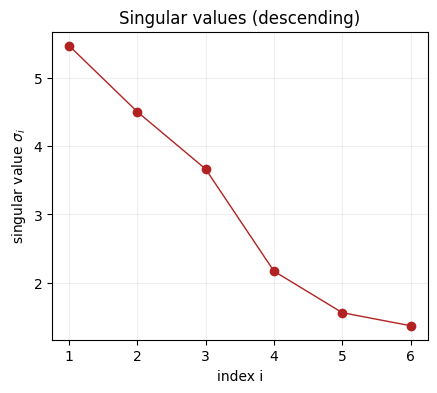

In [37]:
print("Singular values:", S)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(S)+1), S, marker="o", color="firebrick", lw=1)
plt.gca().set_aspect("equal", "box")
plt.xlabel("index i")
plt.ylabel(r"singular value $\sigma_i$")
plt.title("Singular values (descending)")
plt.grid(alpha=0.2)
plt.show()


5. Comment on why singular values appear in descending order, why small singular values correspond to “less important” directions, and why floating-point arithmetic makes exact zeros rare.


## Exercise 2: Best Rank-$k$ Approximation

1. Implement a function:
   
   $$
   A_k = \sum_{i=1}^k \sigma_i u_i v_i^T.
   $$

In [38]:
def rank_k_approx(A, k):
    U,S, Vt = np.linalg.svd(A, full_matrices = False)
    A_k = np.zeros_like(A)
    for i in range(k):
        A_k +=  S[i] * np.outer(U[:, i], Vt[i, :])
    return A_k


2. For several values of $k$, compute:
   
   $$
   E(k) = \|A - A_k\|_F.
   $$


In [40]:
r = min(m, n)
ks = np.arange(1, r+1)

errors = []
for k in ks:
    A_k = rank_k_approx(A, k)
    Ek = np.linalg.norm(A - A_k, "fro")
    errors.append(Ek)
errors = np.array(errors)
print("Errors E(k):", errors)

Errors E(k): [6.53552180e+00 4.73743698e+00 3.00316203e+00 2.07706219e+00
 1.37003863e+00 1.11724574e-14]



3. Plot the approximation error $E(k)$ vs $k$.


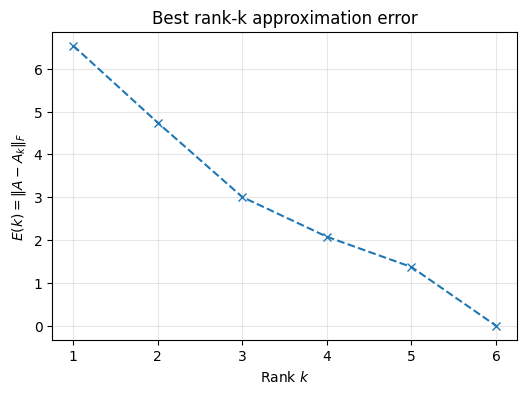

In [43]:
plt.figure(figsize=(6,4))
plt.plot(ks, errors, marker = "x", ls="--")
plt.xlabel(r"Rank $k$")
plt.ylabel(r"$E(k)=\|A-A_k\|_F$")
plt.title("Best rank-k approximation error")
plt.grid(alpha = 0.3)
plt.show()

4. Explain why SVD gives the *optimal* rank-$k$ approximation.
